# Memory & Intelligence
An important part of intelligence stems from memory. Memory -> contextual historic data that informs our predictive ability and actions in our day-day lives.  
**NNs mimic our brains ability to remember through the preservation of the weights along the artificial synapses that link the neurons within the input, hidden and output layers of the NN.**
**The weights are the long-term memory of the ANN.**
# Recurrent Neural Networks
### RNNs (their weights) mimic the short-term memory of the brain.
An RNN is a **squashed & twisted** ANN that has a feedabck loop which generates the short-term memory.
![](images/rnn1.jpg)
![](images/rnn2.jpg)
![](images/rnn3.jpg)
![](images/rnn4.jpg)
![](images/rnn5.jpg)
### The hidden layers know the prior state of the adjacent hidden layer which creates this "short-term memory" feature that RNNs have.
![](images/rnn6.jpg)
#### Now if we extrapolate over multiple layers, we get...............
![](images/rnn7.jpg)
### The power of RNNs is unleashed when they are combined with other NNs such as CNNs and NLP models. This short term memory feature gets transfered to whatever task (visual or text-based) that it is being applied towards.
### Examples of the the uses of RNNs based on their structure
![](images/rnn8.jpg)
1. Top right - contextual image labelling.
2. Top left - chatbots that can keep a conversation going.
3. Bottom right - language translations.
4. Bottom left - real-time video contextual labelling -> Self driving cars.
## The Vanishing Gradient Problem of RNNs.
![](images/rnn10.jpg)
After feed-forward action, the cost function generates the error and now we want to back-propagate this weight adjustment through the the RNN inorder to improve the RNNs accuracy.  
![](images/rnn11.jpg)
Essentially, the weight adjustment process , involves multiplying the previous weights by `Wrec`.  
**The problem comes if `Wrec` is a small number (<<<1). This will result in weights that become very small numbers after the multplication (weight adjustment process) which negatively affects the back-propagation process usign gradient descent because the gradients also continually decrease and....vanish. The lower the gradient is ,the more slower the weights are updated  and ultimately the each prior neuron is being trained less and less which leads to an imbalance in weight training across the entire RNN.**   


**If `Wrec` is too large (>>>1) then we have `exploding` gradients which is another problem all together.**
![](images/rnn12.jpg)

### Dealing with `Vanishing` & `Exploding` gradients
![](images/rnn13.jpg)
# Long Short-Term Memory Networks (LSTMs)
### Academic LSTM Illustration
![](images/lstm2.jpg)
## How did the LSTM improve the RNN ?
### Standard RNN
![](images/rnninside.jpg)
### LSTM
![](images/lstm1.jpg)  

### LSTMs have a `memory cell` `C(t-1) -> C(t)` that flows through 'time' freely allowing for a more robust backpropagation.
![](images/lstm4.jpg)
## The pracitcal workings of LSTMs
![](images/lstm5.jpg)
### Examples
![](images/lstm6.jpg)
![](images/lstm7.jpg)
## LSTM architectural variations
### Standard LSTM
![](images/lstm8.jpg)
### LSTM with peep-holes
![](images/lstm9.jpg)
### LSTM with combined `memory` and `forget` valves
![](images/lstm10.jpg)
### Gated Recurrent Network - eliminates the memory cell.
![](images/lstm11.jpg)

# Objective
### Predicting the stock price trends of Google/Alphabet  in 2017 using historical stock price data.
### I will focus on only the `opening price` trends.
### Regression problem.
## Data
Training data - Google stock price from 2012 - 2016.  
Test data - Google stock price in January 2017.  

## Part 1 - Data Preprocessing

### Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [23]:
train_data = pd.read_csv('data/Google_Stock_Price_Train.csv')
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
training_set = train_data.iloc[:, 1:2].values
training_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

### Feature Scaling
Here I **normalized** the data because it is advisable to do so when working with LSTMs since they utilize the 'sigmoid' activation function on the output layer.

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [26]:
training_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [27]:
len(training_set)

1258

### Creating a data structure with 60 timesteps and 1 output
Correct timestep number prevents overfitting.  
**In this case, a 60 timestep means that a time (t) the LSTM will look at the opening stock prices 60 days before time (t), learn from the trends in the stock price data and use that to predict the stock price at time (t+1).**

In [28]:
X_train = []
y_train = []

for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [29]:
X_train, y_train = np.array(X_train) , np.array(y_train)

Eack X_train list entry contains 60 opening stock prices (t-60:t-1) and the corresponding y_train entry list will contain the opening stock price at time (t)

In [30]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [31]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [32]:
len(X_train), len(y_train)

(1198, 1198)

In [33]:
X_train.shape

(1198, 60)

### Reshaping
Adding the `unit` - the number of predictors we can use to predict the opening stock price.  
This will add an additional dimension to the training data to make it compatible with the LSTM input layer.

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# This np.array shape is now (#stock prices, #timesteps, 1)

In [38]:
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the Stacked RNN (LSTM) Model

### Importing the Keras libraries and packages

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [40]:
rnn = Sequential()

### Adding the first LSTM layer and some Dropout regularisation
We add dropout regularisation to prevent overfitting.

In [41]:
# LSTM layer
rnn.add(LSTM(units = 50, # We want many neurons (higher dimensionality of NN) to capture the complexity of stock price data
             return_sequences = True, # To enable us to add/stack another LSTM layer
             input_shape = (X_train.shape[1], 1))) # Will be (#timesteps, #indicators)

# Dropout Layer
rnn.add(Dropout(0.2)) # 20% dropout - 20% of neurons will be ignored during training.

### Adding a second LSTM layer and some Dropout regularisation

In [42]:
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [43]:
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

### Adding a fourth and final LSTM layer and some Dropout regularisation

In [44]:
rnn.add(LSTM(units = 50, return_sequences = False))
rnn.add(Dropout(0.2))

### Adding the fully connected output layer

In [45]:
rnn.add(Dense(units = 1))

### Compiling the RNN

In [46]:
rnn.compile(optimizer = 'adam',
           loss = 'mean_squared_error') # Since this is a regression problem ( continuous value)

### Fitting the RNN to the Training set

In [47]:
rnn.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 106ms/step - loss: 0.1021
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0037
Epoch 13/100

38/38 [==============================] - 5s 119ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0013


## Part 3 - Making the predictions and visualising the results

### Getting the real stock prices of 2017

In [48]:
test_data = pd.read_csv('data/Google_Stock_Price_Test.csv')
true_stock_prices = test_data.iloc[:, 1:2].values

### Getting the RNN-predicted stock prices of 2017

In [49]:
# Concatenating the train_data and test_data
all_data = pd.concat((train_data.Open, test_data.Open), axis=0)
all_data.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [50]:
# Get the inputs - From the 2017 data -  At each time (t) we need the previous 60 stock prices 
inputs = all_data[(len(all_data) - len(test_data))-60:].values
inputs = inputs.reshape(-1,1)

# Scaling the inputs
inputs = sc.transform(inputs)

In [51]:
len(true_stock_prices)

20

In [52]:
# Reshaping the inputs just like X_train
X_test = []

for i in range(60, 60+len(true_stock_prices)):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# This np.array shape is now (#stock prices, #timesteps, 1)

### Making predictions using X_test

In [53]:
predicted_stock_prices = rnn.predict(X_test)

# Inverse transforming the predictions
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

### Visualising the results

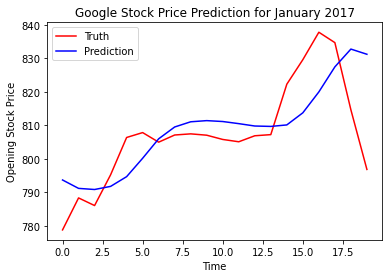

In [59]:
plt.plot(true_stock_prices, color = 'red', label = 'Truth')
plt.plot(predicted_stock_prices, color = 'blue', label = 'Prediction')
plt.title('Google Stock Price Prediction for January 2017')
plt.xlabel('Time')
plt.legend()
plt.ylabel('Opening Stock Price')
plt.show();

## Part 4 - Evaluating the RNN using RMSE (Root Mean Squared Error)

In [60]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(true_stock_prices, predicted_stock_prices))
print("The RNNs RMSE is: ", rmse)

The RNNs RMSE is:  11.939283094427015


### An RMSE of around 12 for opening stock prices ranging from 778 - 837 indicates realiable and accurate stock price predictions.

## How can I improve this RNN (LSTM) Model in the future ? 
1. **Getting more training data**: I trained the RNN model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.
2. **Increasing the number of timesteps**: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because I chose a number of 60 timesteps (3 months). I could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).
3. **Adding some other indicators**: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.
4. **Adding more LSTM layer**s: I built a RNN with four LSTM layers but it would be wise to try with even more.
5. **Adding more neurones in the LSTM layers**: I would try an architecture with even more neurones in each of the 4 (or more) LSTM layers.